In [126]:
# Zadanie 1
# 1. Napisz funkcję do wczytywania waluty nbp z zadanego okresu (wszystko przekazywane jako parametr)
#    dowolny ze sposobów (plik csv, read_json, dowolne inne)


# import modułu jak w przykładzie
import pandas as pd 

def getCurrencyRates(currency):
    # zaciąganie danych z CSV, Project Manager byłby dumny. Drugi wiersz zawiera zbędne dane stąd skiprows.
    currencyCsv = pd.read_csv('./WSiZ_SI_Lab/archiwum_tab_a_2019.csv', sep=';', usecols=['data', '1' + currency], skiprows=[1])
    currencyCsv.columns = ['date', 'value']
    # zamiana na DataFrame z pominięciem trzech ostatnich wierszy (nie wiem kto wymyślał ten format)
    currencyValuesDF = (pd.DataFrame.from_dict(currencyCsv))[:-3]

    # Na koniec zmiana typu daty na datetime:
    currencyValuesDF['date'] = pd.to_datetime(currencyValuesDF['date'])
    #currencyValuesDF = currencyValuesDF.set_index('date')

    return currencyValuesDF
    

def getCurrencyRatesByDate(startDate, endDate, currency):
    currencyValues = getCurrencyRates(currency)
 
    return currencyValues[(currencyValues['date'] >= startDate) & (currencyValues['date'] <= endDate)]

#print(currencyValuesDF.loc[startDate : endDate])

In [127]:
# 2. Używając stworzonej funkcji wczytaj dane dwóch wybranych przez siebie kursów

usdRates = getCurrencyRatesByDate('2019-11-01', '2019-11-30', 'USD')
eurRates = getCurrencyRatesByDate('2019-11-01', '2019-11-30', 'EUR')


In [128]:
# 3. Zbadaj wczytane dane za pomocą wybranych poleceń, oczyść jeżeli to konieczne i ustaw indeksy na datę.
#    Plus za konwersję do typu data/czas

# Dane są już oczyszczone, a data przekonwertowana (zad 1), zaczynamy zabawę:
# Sprawdzenie typu danych:
print(usdRates.dtypes)
# podgląd zmiennej:
print(usdRates.head())
# ustawienie indeksu na date:
newUsdRates = usdRates.set_index('date')
print(newUsdRates.head())


date     datetime64[ns]
value            object
dtype: object
          date   value
212 2019-11-04  3,8099
213 2019-11-05  3,8308
214 2019-11-06  3,8497
215 2019-11-07  3,8502
216 2019-11-08  3,8625
             value
date              
2019-11-04  3,8099
2019-11-05  3,8308
2019-11-06  3,8497
2019-11-07  3,8502
2019-11-08  3,8625


In [129]:
# 4. Użyj funkcji corrcoef z pakietu numpy żeby obliczyć wzajemną korelację wybranych kursów

import numpy as np

#zamiana typu z DT na array zgodnie z wymaganiami numpy 
usdArray = []
for usdRow in usdRates['value']:
    usdRow = usdRow.replace(',','.')
    pd.to_numeric(usdRow)
    usdArray.append(usdRow)

eurArray = []
for eurRow in eurRates['value']:
    eurRow = eurRow.replace(',','.')
    pd.to_numeric(eurRow)
    eurArray.append(eurRow)

corrcoef(array(usdArray).astype(np.float), array(eurArray).astype(np.float))


array([[1.        , 0.92753279],
       [0.92753279, 1.        ]])

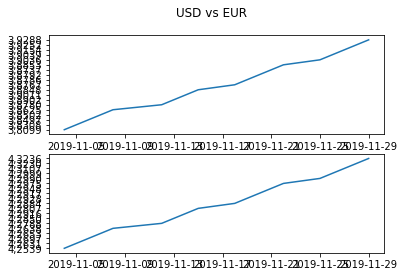

In [130]:
# 5. Zweryfikuj związek z punktu wyżej rysując wykresy obydwu wybranych przez siebie walut
#    Plus za wykorzystanie funkcji plt.subplot()

import matplotlib.pyplot as plt

# generowanie danych do wykresów
wykres1 = usdRates.set_index(['date'])['value']
wykres2 = eurRates.set_index(['date'])['value']

# tworzenie subplot
fig, axs = plt.subplots(2) 
fig.suptitle('USD vs EUR')
axs[0].plot(wykres1) 
axs[1].plot(wykres2)

plt.show()